In [1]:
# Ana Lucía Cárdenas Pérez
# A01284090
# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [3]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv('iris.data', names = columns)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
columnas = ["sepal length", "sepal width", "petal length", "petal width"]
X = df[columnas]
y = df['class']
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns

Separamos datos train/test

In [5]:
#Utilizamos train test split para poder separar los datos en 35% prueba, 65% entrenamiento y random state 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)


Arbol con entropy

In [6]:
#Cambiamos el max depth del decision tree classifier a 3 con criterion de entropy.
myTree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
myTree_entropy.fit(X_train, y_train)
#Guardaremos los valores predict de X_test en y_pred
y_pred = myTree_entropy.predict(X_test)

In [7]:
#imprimimos el decision tree con entropy y un max depth de 3.
print("\nDecision Tree con Entropy y Max Depth 3")
print(tree.export_text(myTree_entropy))


Decision Tree con Entropy y Max Depth 3
|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



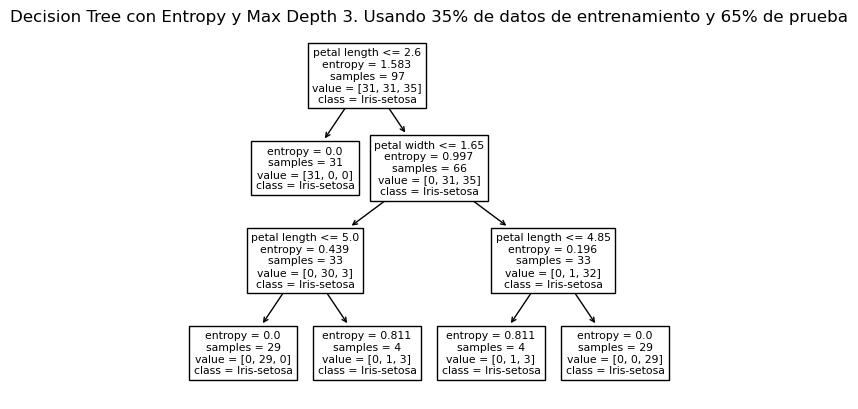

In [8]:
tree.plot_tree(myTree_entropy, feature_names=columns, class_names=y)
plt.title("Decision Tree con Entropy y Max Depth 3. Usando 35% de datos de entrenamiento y 65% de prueba")
plt.show()

Arbol con gini

In [9]:
#Cambiamos el criterio a gini con max depth de 4
myTree_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4)
myTree_gini.fit(X_train, y_train)

y_pred_gini = myTree_gini.predict(X_test)

print("\nDecision Tree con Gini y Max Depth 4")
print(tree.export_text(myTree_gini))


Decision Tree con Gini y Max Depth 4
|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



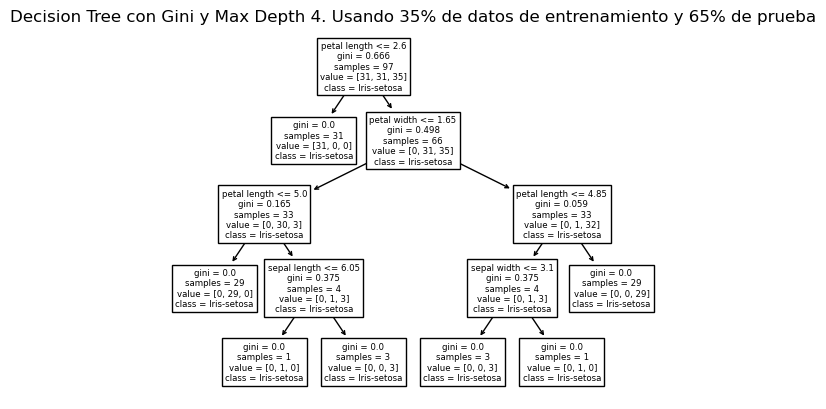

In [10]:
# Plotting the Decision Trees
tree.plot_tree(myTree_gini, feature_names=columns, class_names=y)
plt.title("Decision Tree con Gini y Max Depth 4. Usando 35% de datos de entrenamiento y 65% de prueba")

plt.show()

Accuracy con entropy y gini con train test

In [11]:
# Accuracy de Decission Tree con entropy
myTree_entropy.score(X_test,y_test)

0.9622641509433962

In [12]:
# Accuracu de Decission Tree con Gini
myTree_gini.score(X_test,y_test)

0.9622641509433962

In [13]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = myTree_entropy.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')  # Cambia 'binary' a 'weighted'

# Imprimir las métricas
print("Métricas en el conjunto de prueba:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix_test)
print("F1 Score:", f1_score_test)

Métricas en el conjunto de prueba:
Accuracy: 0.9622641509433962
Confusion Matrix:
 [[19  0  0]
 [ 0 18  1]
 [ 0  1 14]]
F1 Score: 0.9622641509433962


Tienen el mismo accuracy

Decission Tree ahora con Train/Test/Validation

In [14]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
# Entrenar el modelo en el conjunto de entrenamiento
myTree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Cargamos de sklearn el accuracy score, confusion matrix y f1 score

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [17]:
myTreeVal = tree.DecisionTreeClassifier(criterion="entropy")

myTreeVal.fit(X_train, y_train)

y_predVal = myTreeVal.predict(X_temp)

In [18]:
print(tree.export_text(myTreeVal))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.60
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 5.15
|   |   |   |--- feature_3 <= 1.75
|   |   |   |   |--- feature_1 <= 2.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  2.35
|   |   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |   |--- feature_0 <= 6.15
|   |   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |   |--- feature_0 >  6.15
|   |   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.75
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: Iris-

[Text(0.3333333333333333, 0.9375, 'x[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.6875, 'x[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'x[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.5625, 'x[3] <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.3333333333333333, 0.4375, 'x[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'x[2] <= 5.05\ne

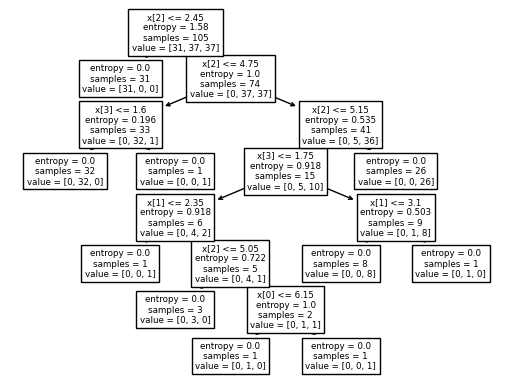

In [19]:
tree.plot_tree(myTreeVal)

Evaluamos con validacion

In [21]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = myTreeVal.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
f1_score_val = f1_score(y_val, y_pred_val, average='weighted')  # Cambia 'binary' a 'weighted'

In [22]:
print("\nMétricas en el conjunto de validación:")
print("Accuracy:", accuracy_val)
print("Confusion Matrix:\n", confusion_matrix_val)
print("F1 Score:", f1_score_val)


Métricas en el conjunto de validación:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]
F1 Score: 1.0


Llevamos a cabo pruebas con los valores de prueba y de validación. Con los valores de prueba obtuvimos accuracy y f1-score de 0.96 mientras que con los valores de validación, se obtuvo un valor de 1 en ambas. Por lo que llevamos a cabo el siguiente análisis de Bias, Varianza, Fit Level. 

En el caso de los valores de validación:
Como el valor que se obtuvo de accuracy y de F1-Score es de 1, el sesgo del conjunto de validación es de Bajo Sesgo, el cual se define como que tiene un alto rendimiento y que el modelo está capturando las relaciones de los datos de manera correcta.

Por lo mismo que los valores que obtuvimos fueron de 1, la vaianza es baja y no hay overfitting ni underfitting a los datos de entrenamiento. 
